# **Previsão de Vendas Futuras**

### **Objetivo**

* Construir um algoritmo de Machine Learning capaz de prever vendas futuras.

### **1. Introdução**

<p align="justify">
Este projeto de machine learning tem como principal objetivo utilizar a técnica de regressão linear para prever o valor futuro de vendas. A previsão de vendas desempenha um papel crítico em diversas indústrias, permitindo às organizações se prepararem para a demanda do mercado, otimizarem seus recursos e desenvolverem estratégias de negócios mais eficazes.

<p align="justify">
Neste contexto, a regressão linear se apresenta como uma ferramenta poderosa para modelar a relação entre variáveis independentes, como histórico de vendas, investimentos em marketing, sazonalidade e outros fatores relevantes, e a variável dependente, que representa as vendas futuras. O projeto visa desenvolver um modelo de regressão linear preciso e confiável que permitirá tomar decisões informadas e ajustar estratégias de acordo com as previsões.

In [ ]:
# Carregando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
sns.set()

In [ ]:
# Carregando base de dados

dados = pd.read_csv('/content/drive/MyDrive/Ciência de Dados com Python/Projetos/Dados/Vendas.csv', sep = ',')

In [ ]:
# Visualizando dados

dados.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### **2. Análise Exporatória de Dados**

In [ ]:
# Informações do dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Verificando a existência de valores faltantes

dados.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# Descritiva dos dados

dados.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


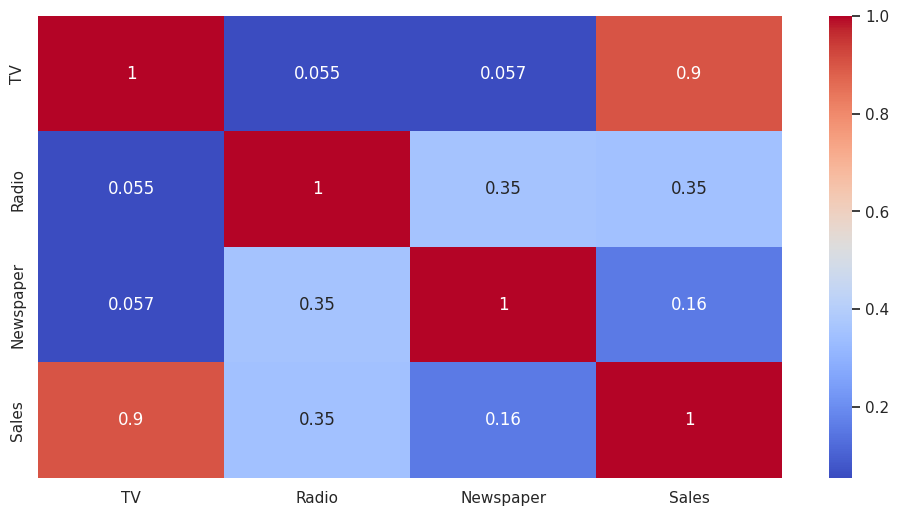

In [ ]:
# Correlação entre as variáveis

plt.figure(figsize=(12, 6))
sns.heatmap(data = dados.corr(),
            annot = True,
            cmap = 'coolwarm')

plt.show();

In [ ]:
# Testando normalidade das variáveis

import scipy.stats as stats

print(stats.anderson(dados['TV'] , 'norm'))
print(stats.anderson(dados['Radio'], 'norm'))
print(stats.anderson(dados['Newspaper'], 'norm'))
print(stats.anderson(dados['Sales'], 'norm'))

AndersonResult(statistic=2.7920104334720293, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=147.0425, scale=85.85423631490808)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AndersonResult(statistic=2.969383195492952, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=23.264000000000006, scale=14.846809176168724)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AndersonResult(statistic=3.060173280198228, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=30.553999999999995, scale=21.778620838522826)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AndersonResult(statisti

### **3. Pré-Processamento de Dados**

In [ ]:
# Separando dados em previsores e target

previsores = np.array(dados[['TV', 'Radio', 'Newspaper']])
target = np.array(dados['Sales'])

In [ ]:
# Dividindo os dados em treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(previsores,
                                                        target,
                                                        test_size = 0.3,
                                                        random_state = 0)

In [ ]:
# Verificando shape das variáveis

print(X_treino.shape)
print(y_treino.shape)
print(X_teste.shape)
print(y_teste.shape)

(140, 3)
(140,)
(60, 3)
(60,)


### **4. Construindo Modelo**

In [ ]:
# Instânciando modelo

modelo = LinearRegression()

In [ ]:
# Treinando modelo

modelo.fit(X_treino, y_treino)

LinearRegression()

In [ ]:
# Aplicando modelo aos dados de teste: realizando previsões

y_predito = modelo.predict(X_teste)

### **5. Avaliando e Testando o Modelo**

In [ ]:
# Acurácia do modelo

modelo.score(X_teste, y_teste)

0.869205273491013

In [ ]:
# RMSE

rmse = np.sqrt(mean_squared_error(y_teste, y_predito))
rmse

1.9844433024100956

In [ ]:
# R²

r2 = r2_score(y_teste, y_predito)
r2

0.869205273491013

In [ ]:
# Aplicando o modelo a novos dados

new_data = np.array([[199.5, 37.8, 69.2]])
modelo.predict(new_data)

array([19.69903131])

### **6. Conclusão**

<p align="justify">
Realizada todas as etapas de análise exploratória e pré-processamento dos dados, foi construido um modelo de Machine Learning utilizando a Regressão Linear objetivando prever vendas futuras. Analisando as métricas do modelo, pode-se afirmar que o mesmo apresenta um bom desempenho. Seu RMSE é de 1.98, ou seja, em média os dados previstos estão distantes dos reais 1.98 unidades. Já R² é de 0.86(86%), indicando que 86% da variável dependente(Sales) pode ser explicada pelas variáveis independentes(TV, Radio, Newspaper).